In [1]:
import sys
from pathlib import Path

# Get the current working directory
current_dir = Path().resolve()

# Add Management to sys.path (used to import files)
sys.path.append(str(current_dir.parent / 'Management'))
from parameterExploring import assignColors
from simulationManager import SimulationManager
from configGenerator import ConfigGenerator, SimulationConfig
from multiprocessing import Pool
from datetime import time
import numpy as np    

c=None


configs, labels = ConfigGenerator.generate(rows=16, cols=16, startLoad=0.15, nrThreads=1,
                        loadIncrement=1E-5, maxLoad=1, alphaStart=[0.01, 0.1, 0.3],
                        LBFGSEpsg=[9e-4,9e-5,9e-6], eps=[1e-3,1e-4,1e-5],
                        scenario="simpleShear")

extra_config1 = SimulationConfig(rows=16, cols=16, startLoad=0.15, nrThreads=1,
                        loadIncrement=1E-5, maxLoad=1, alphaStart=0.1,
                        LBFGSEpsx=1e-6,minimizer="LBFGS",
                        scenario="simpleShear")

extra_config2 = SimulationConfig(rows=16, cols=16, startLoad=0.15, nrThreads=1,
                        loadIncrement=1E-5, maxLoad=1,
                        LBFGSEpsg=9e-5,
                        minimizer="LBFGS",
                        scenario="simpleShear")

extra_config3 = SimulationConfig(rows=16, cols=16, startLoad=0.15, nrThreads=4,
                        loadIncrement=1E-5, maxLoad=1,
                        LBFGSEpsg=9e-5,
                        eps=1e-4, 
                        minimizer="LBFGS",
                        scenario="simpleShear")

# configs += [extra_config1, extra_config2]
# labels += ["UmutParam", "onlyLBFGS"]

configs.append(extra_config3)
labels.append("onlyLBFGSLocal")

c = assignColors(configs, [
    ['alphaStart', 0.01, 'black'],
    ['alphaStart', 0.1, 'red'],
    ['alphaStart', 0.3, 'blue'],
                      ])


# Now we can import from Management
from remotePlotting import get_csv_files

from makePlots import makeEnergyPlot, makePowerLawPlot, makeItterationsPlot
paths = get_csv_files(configs)
   

28 files found. Not searching servers.


Plot saved at: "/Volumes/data/MTS2D_output/simpleShear,s16x16l0.15,1e-05,1PBCt1LBFGSEpsg0.0009alphaStart0.01eps0.001s0/ParamExploration.pdf"


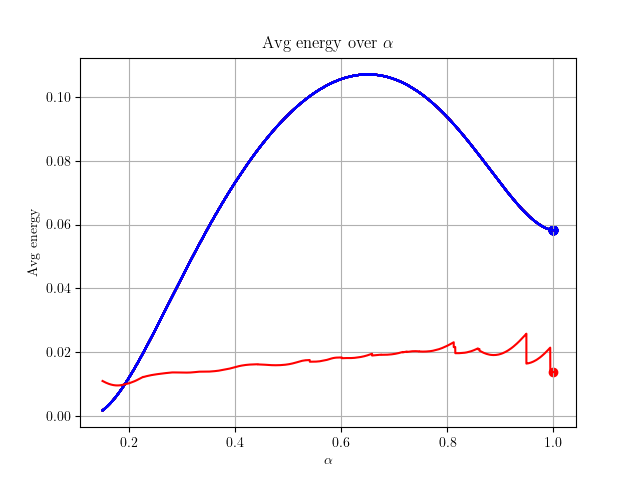

In [3]:
%matplotlib widget
makeEnergyPlot(paths, "ParamExploration.pdf", colors=c, labels=labels, show=True, legend=False)    
#makeItterationsPlot(paths, "ParamExploration.pdf", colors=c, labels=labels, show=True)
#makePowerLawPlot(paths, "ParamExplorationPowerLaw.pdf", colors=c, labels=labels, show=True) 